# Are there meta features that are useful for prediction?

In [1]:
import pandas as pd
import torch
from tqdm import tqdm
from path import Path
from PIL import Image
import utils

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the Data

In [3]:
labels = pd.read_csv(utils.data_fp/'train.csv')

In [4]:
labels.head()

Image         Id
0  0000e88ab.jpg  w_f48451c
1  0001f9222.jpg  w_c3d896a
2  00029d126.jpg  w_20df2c5
3  00050a15a.jpg  new_whale
4  0005c1ef8.jpg  new_whale

## Shape of the images

In [5]:
# function to get image shape
def get_image_shape(image_list, file_path):
    file_path = Path(file_path)
    result = []
    
    for img in tqdm(image_list):
        result.append(Image.open(file_path/img).size)
    
    return result

In [6]:
labels['img_shape'] = get_image_shape(labels.Image.to_list(), utils.data_train)

100%|██████████| 25361/25361 [00:01<00:00, 14449.06it/s]


In [7]:
labels['width'] = labels.img_shape.apply(lambda x: x[0])
labels['height'] = labels.img_shape.apply(lambda x: x[1])

In [8]:
labels.head()

Image         Id    img_shape  width  height
0  0000e88ab.jpg  w_f48451c  (1050, 700)   1050     700
1  0001f9222.jpg  w_c3d896a   (758, 325)    758     325
2  00029d126.jpg  w_20df2c5  (1050, 497)   1050     497
3  00050a15a.jpg  new_whale  (1050, 525)   1050     525
4  0005c1ef8.jpg  new_whale  (1050, 525)   1050     525

## Calculate the percentage of new_whale by image shape

In [9]:
def n_images(x): return len(x)
def pct(x): return (x == "new_whale").mean()

In [10]:
pct_new_whale = labels.groupby("img_shape").Id.agg([n_images, pct]);
pct_new_whale.head()

n_images  pct
img_shape                
(77, 30)           1  0.0
(142, 81)          1  1.0
(152, 47)          1  0.0
(164, 94)          1  1.0
(164, 212)         1  0.0

## Which image size has the largest rate of new_whale?

I am interested in the largest population as well and threshold for being large is 70%

In [11]:
high = pct_new_whale[pct_new_whale.pct >= 0.7].sort_values("n_images", ascending=False)
high.head(10)

n_images       pct
img_shape                      
(700, 500)        667  0.863568
(879, 584)        148  0.824324
(700, 400)         96  0.906250
(700, 450)         48  0.791667
(1050, 691)        32  0.781250
(699, 500)         25  0.880000
(1050, 603)        23  0.782609
(875, 500)         19  0.789474
(1050, 735)        18  0.833333
(1050, 602)        16  0.750000

In [12]:
high.n_images.sum()

3783

## Which image size has the loweste rate of new_whale?

I am interested in the largest population as well and threshold for being less than 30%.

In [13]:
low = pct_new_whale[pct_new_whale.pct <= .3].sort_values("n_images")
low.head()

n_images  pct
img_shape                
(77, 30)           1  0.0
(908, 519)         1  0.0
(908, 545)         1  0.0
(908, 592)         1  0.0
(909, 389)         1  0.0

In [14]:
low.n_images.sum()

12251

## High and Low accounts for?

In [15]:
(high.n_images.sum() + low.n_images.sum()) / (pct_new_whale.n_images.sum())

0.6322305902764087

## Weird shape images

Some of the images has very large width 

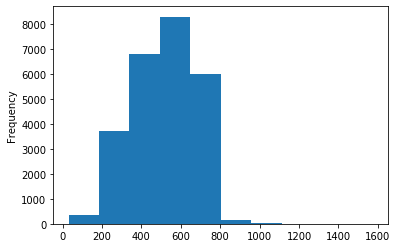

In [16]:
labels.height.plot(kind='hist');

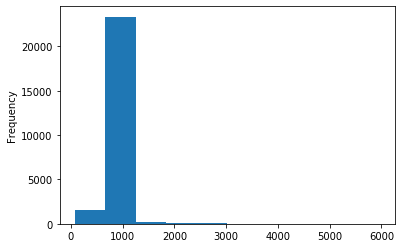

In [17]:
labels.width.plot(kind='hist');

In [18]:
width = 3000
print(f'Number of images with width larger than {width}: {(labels.width > width).sum()}')
labels[labels.width > width].sample(5, random_state=42)

Number of images with width larger than 3000: 66


Image         Id    img_shape  width  height
19491  c48aff450.jpg  new_whale  (3610, 654)   3610     654
23326  eaf4f071b.jpg  w_9d29561  (3501, 700)   3501     700
776    07ba8f748.jpg  new_whale  (3166, 488)   3166     488
14643  9338e11b1.jpg  new_whale  (5640, 663)   5640     663
2596   1a938ff61.jpg  new_whale  (3630, 606)   3630     606

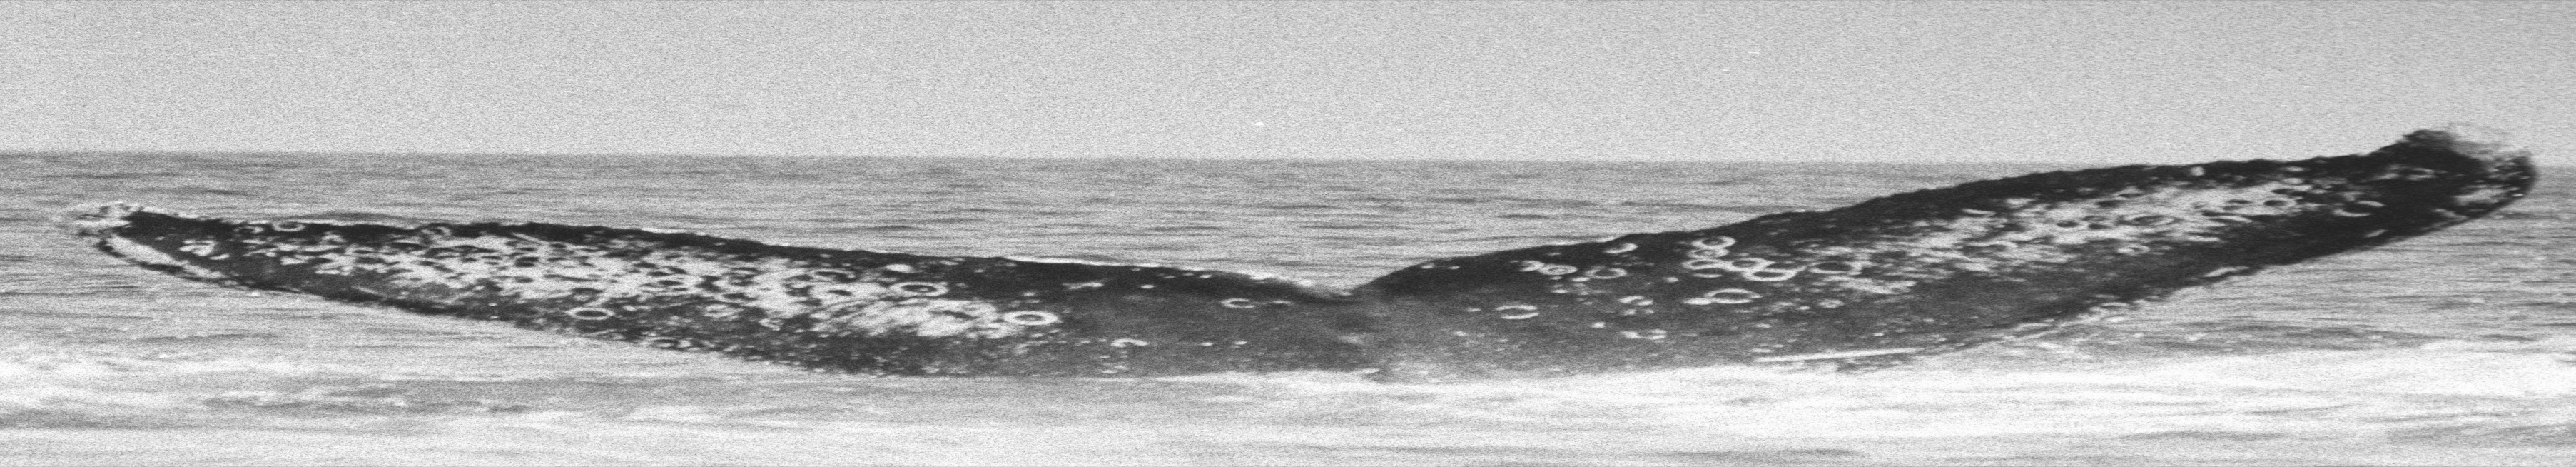

In [19]:
# let's look at a random few
Image.open(utils.data_train/"c48aff450.jpg")

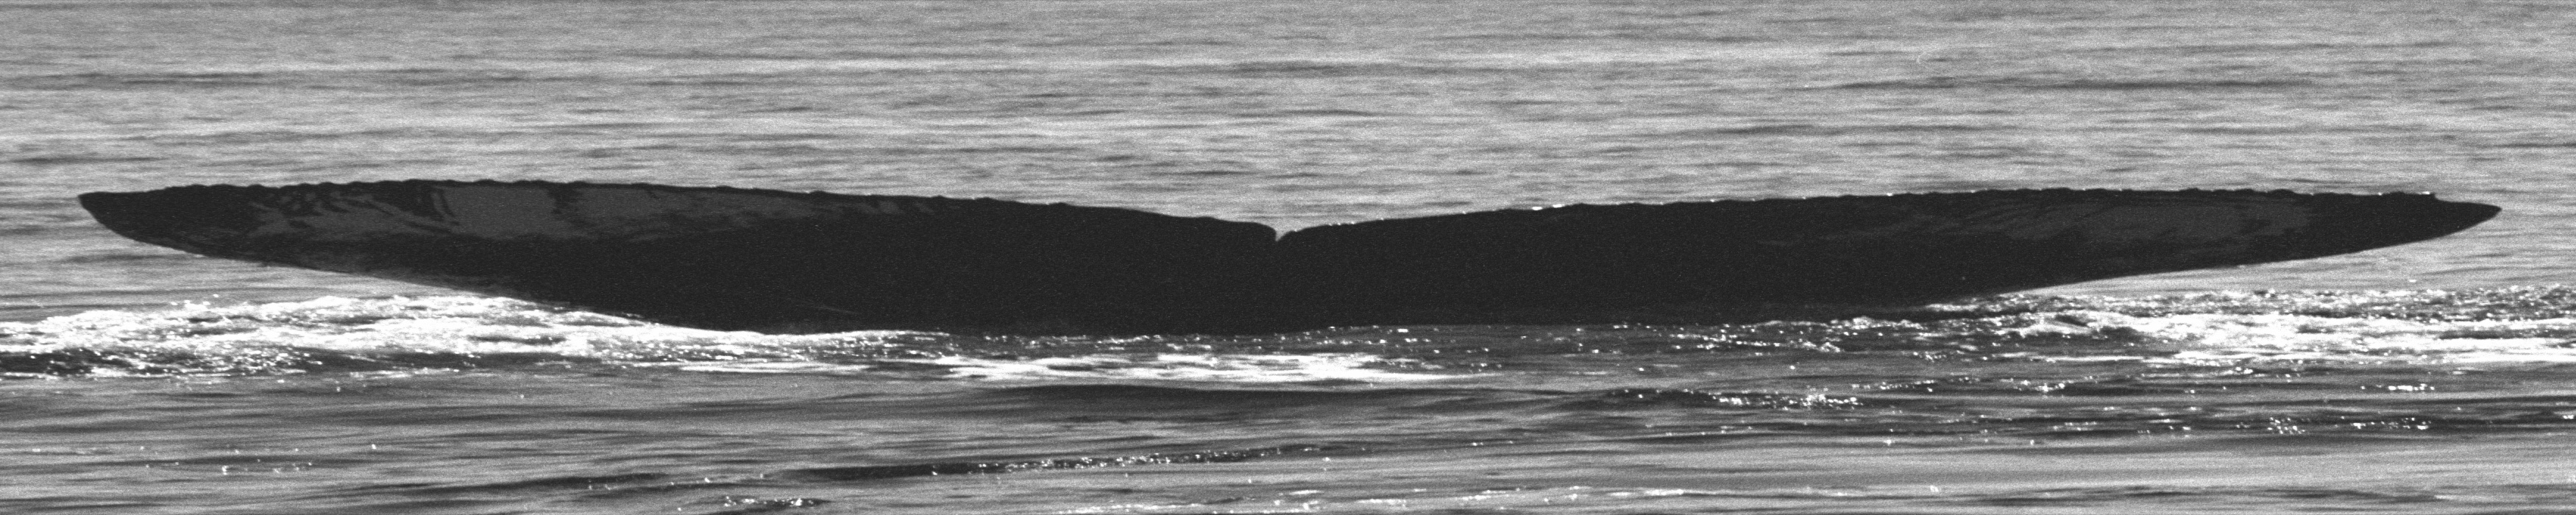

In [20]:
Image.open(utils.data_train/"eaf4f071b.jpg")

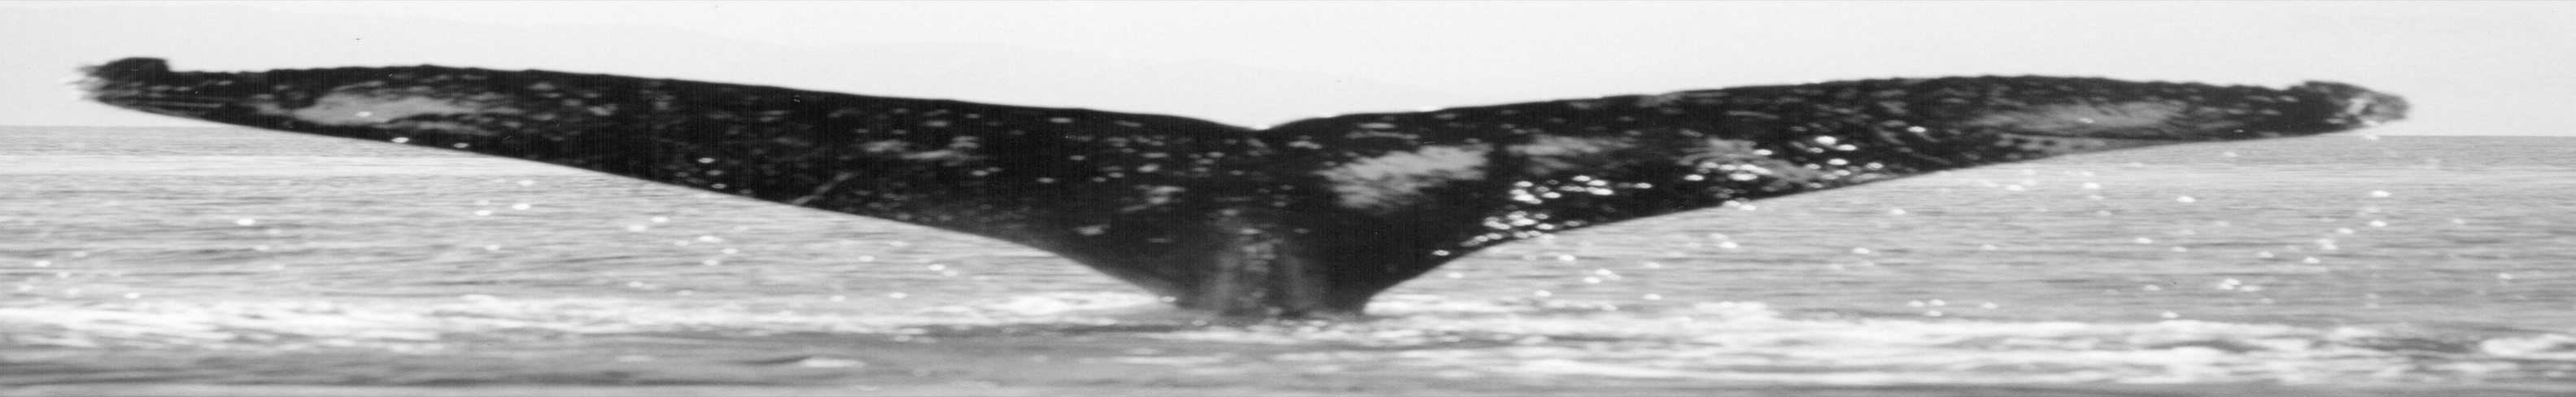

In [21]:
Image.open(utils.data_train/"07ba8f748.jpg")

These images look fine, but they are just super large. 